# To Do

* Sample statistics
* tables
* 

For next time:
* density catalog
* review text
* tables for spines (GL)
* master table

* calculate local density using sdss spec sample

In [105]:
from astropy.io import fits, ascii
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
from scipy.stats import ks_2samp
%matplotlib inline

In [106]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'
plotdir = '/home/rfinn/research/Virgo/plots/'

In [225]:
%run ~/github/Virgo/programs/readtables.py

<Figure size 432x288 with 0 Axes>

In [130]:
v.main

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,name
,,,,arcsec,,,,,,,,,,,,,,,,,,
bytes8,float32,float32,float32,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bytes38,bytes8
VFID0000,185.86877,74.95225,1418.8,23.829847,True,NGC4363,0,0,0,NGC 4363,True,False,False,False,False,False,False,True,False,False,VFID0000-NGC4363,VFID0000
VFID0001,182.208,74.904274,1331.5,49.6731,True,NGC4133,0,0,0,NGC 4133,True,False,False,False,False,False,False,True,True,False,VFID0001-NGC4133,VFID0001
VFID0002,145.94466,74.85958,3049.4,62.3909,True,NGC2977,0,0,0,NGC 2977,True,False,False,False,False,False,False,True,True,False,VFID0002-NGC2977,VFID0002
VFID0003,185.57309,74.83839,1833.0,26.128908,True,PGC040048,0,0,0,CGCG 352-030,True,False,False,False,False,False,False,True,False,False,VFID0003-CGCG352-030,VFID0003
VFID0004,182.82774,74.80822,1683.0,40.937492,True,UGC07189,0,0,0,UGC 07189,True,False,False,False,False,False,False,True,False,False,VFID0004-UGC07189,VFID0004
VFID0005,173.13419,74.62754,1920.1,48.654305,True,NGC3752,0,0,0,NGC 3752,True,False,False,False,False,False,False,True,True,True,VFID0005-NGC3752,VFID0005
VFID0006,121.91241,74.58463,2333.0,26.984928,True,UGC04202,0,0,0,UGC 04202,True,False,False,False,False,False,False,True,True,False,VFID0006-UGC04202,VFID0006
VFID0007,118.2363,74.57653,2346.0,23.448833,True,PGC022064,0,0,0,KUG 0746+747,True,False,False,False,False,False,False,True,False,False,VFID0007-KUG0746+747,VFID0007


# HI Deficiency #


In [34]:
v.a100.colnames

['VFID',
 'RA',
 'DEC',
 'NEDname',
 'modz',
 'e_modz',
 'mod0',
 'e_mod0',
 'vmaxg',
 'e_vmaxg',
 'vmaxs',
 'e_vmaxs',
 'vdis',
 'e_vdis',
 'Separation',
 'PROFMEAN',
 'PROFMEAN_IVAR',
 'QSTOKES',
 'USTOKES',
 'BASTOKES',
 'PHISTOKES',
 'AID',
 'PID',
 'DVERSION',
 'PROFTHETA',
 'FIBERID',
 'MJD',
 'RACAT',
 'DECCAT',
 'HIdef',
 'HIdef_flag',
 'HIdef_bos',
 'HIdef_jon',
 'HIdef_bytype']

### Toribio vs Jones

Toribio shows more HI def whereas center
of Jones distribution is closer to zero.
need to look at Jones paper to see what's going on

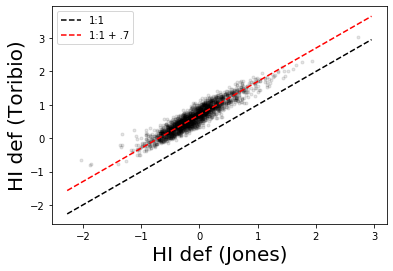

In [50]:
# compare different estimates
flag = v.a100['HIdef_flag']
plt.figure()
plt.plot(v.a100['HIdef_jon'][flag],v.a100['HIdef'][flag],'k.',alpha=.1)
plt.ylabel('HI def (Toribio)',fontsize=20)
plt.xlabel('HI def (Jones)',fontsize=20)
xmin,xmax = plt.xlim()
xl = np.linspace(xmin,xmax, 100)
plt.plot(xl,xl,'k--',label='1:1')
plt.plot(xl,xl+.7,'r--',label='1:1 + .7')
plt.legend()

# Variations with Morphology

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


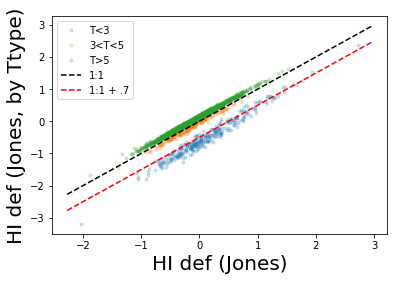

In [66]:
# compare different estimates
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
baseflag = v.a100['HIdef_flag'] &(~np.isnan(v.hl['t']))
flag1 = baseflag & (v.hl['t'] < 3)
flag2 = baseflag & (v.hl['t'] >= 3)& (v.hl['t'] <= 5)
flag3 = baseflag & (v.hl['t'] > 5)
flags = [flag1,flag2,flag3]
labels= ['T<3','3<T<5','T>5']
plt.figure()
for i,f in enumerate(flags):
    plt.plot(v.a100['HIdef_jon'][f],v.a100['HIdef_bytype'][f],'k.',c=mycolors[i],alpha=.2,label=labels[i])
plt.ylabel('HI def (Jones, by Ttype)',fontsize=20)
plt.xlabel('HI def (Jones)',fontsize=20)
xmin,xmax = plt.xlim()
xl = np.linspace(xmin,xmax, 100)
plt.plot(xl,xl,'k--',label='1:1')
plt.plot(xl,xl-.5,'r--',label='1:1 + .7')
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


comparing env=0 and 1
Ks_2sampResult(statistic=0.039373378930808056, pvalue=0.9581704337965835)
comparing env=0 and 2
Ks_2sampResult(statistic=0.14300518134715026, pvalue=0.21799796087939805)
comparing env=1 and 2
Ks_2sampResult(statistic=0.12793501925975548, pvalue=0.21939029453591152)


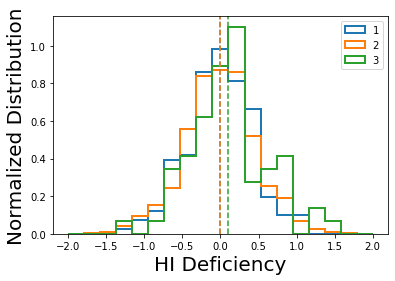

In [104]:
plt.figure()
baseflag = v.a100['HIdef_flag'] &(~np.isnan(v.hl['t'])) & (~np.isnan(v.a100['HIdef_bytype']))
flag0 = baseflag & (v.env['flag_env'] == 0)
flag1 = baseflag & (v.env['flag_env'] == 1)
flag2 = baseflag & (v.env['flag_env'] == 2)
flag3 = baseflag & (v.env['flag_env'] == 3)
flags = [flag1,flag2,flag3]
labels= ['1','2','3']
mybins = np.linspace(-2,2,20)
for i,f in enumerate(flags):
    var = v.a100['HIdef_bytype'][f]
    t=plt.hist(var,color=mycolors[i],label=labels[i],histtype='step',bins=mybins,lw=2,normed=True)
    #print(np.median(var))
    plt.axvline(x=np.median(var),color=mycolors[i],ls='--')
plt.legend()
plt.xlabel('HI Deficiency',fontsize=20)
plt.ylabel('Normalized Distribution',fontsize=20)

# compare distributions with KS test
print('comparing env=0 and 1')
print(ks_2samp(v.a100['HIdef_bytype'][flag1],v.a100['HIdef_bytype'][flag2]))
print('comparing env=0 and 2')
print(ks_2samp(v.a100['HIdef_bytype'][flag1],v.a100['HIdef_bytype'][flag3]))
print('comparing env=1 and 2')
print(ks_2samp(v.a100['HIdef_bytype'][flag2],v.a100['HIdef_bytype'][flag3]))

* look at galaxies at fixed stellar mass cut
* look at local density
* look at spatial distribution - only have HI for region of ALFALFA

Text(0, 0.5, 'BV Environment Flag')

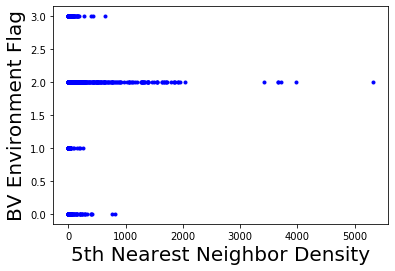

In [97]:
plt.figure()
plt.plot(v.env['n5th'],v.env['flag_env'],'b.')
plt.xlabel('5th Nearest Neighbor Density',fontsize=20)
plt.ylabel('BV Environment Flag',fontsize=20)

In [84]:
v.env.colnames

['VFID_1',
 'prefix',
 'radius',
 'objname',
 'Vcosmic',
 'DEC',
 'radius_flag',
 'SGY',
 'SGX',
 'SGZ',
 'NSAID',
 'NEDname',
 'Dmedian',
 'nCI08',
 'RA',
 'Virgo_infall',
 'Steerflag',
 'HAflag',
 'distSGY_Virgo',
 'Vmodel',
 'distSGZ_Virgo',
 'HAobsflag',
 'V_LG',
 'nCI08_err',
 'n5th_2D',
 'name',
 'n5th_2D_err',
 'vr',
 'flag_cluster',
 'n5th',
 'distSGX_Virgo',
 'n5th_err',
 'VFID_2',
 'flag_env']

# Catalog Statistics #

In [127]:
def printstats(flag,name):
    print(name+' stats')
    print('number = {:4d}/{:4d} ({:.3f})'.format(sum(flag),len(flag),sum(flag)/len(flag)))

In [108]:
print('total number of galaxies in the catalog = ',len(v.main))
print('number with HL data = ',sum(v.main['HLflag']))
print('fraction with HL data = %.3f '%(sum(v.main['HLflag'])/len(v.main)))

total number of galaxies in the catalog =  6797
number with HL data =  6636
fraction with HL data = 0.976 


In [133]:
flags = ['HLflag','NSAflag','NSAV0flag','A100flag','COflag','HAflag','HAobsflag','Steerflag','Z0MGSflag','unwiseflag']
for f in flags:
    printstats(v.main[f],f)

HLflag stats
number = 6636/6797 (0.976)
NSAflag stats
number = 5284/6797 (0.777)
NSAV0flag stats
number = 5248/6797 (0.772)
A100flag stats
number = 2336/6797 (0.344)
COflag stats
number =  242/6797 (0.036)
HAflag stats
number =   48/6797 (0.007)
HAobsflag stats
number =  100/6797 (0.015)
Steerflag stats
number = 1884/6797 (0.277)
Z0MGSflag stats
number = 2375/6797 (0.349)
unwiseflag stats
number = 6126/6797 (0.901)


# Sample Overview

Text(0.5, 1.0, 'Virgo Filament Sample v1')

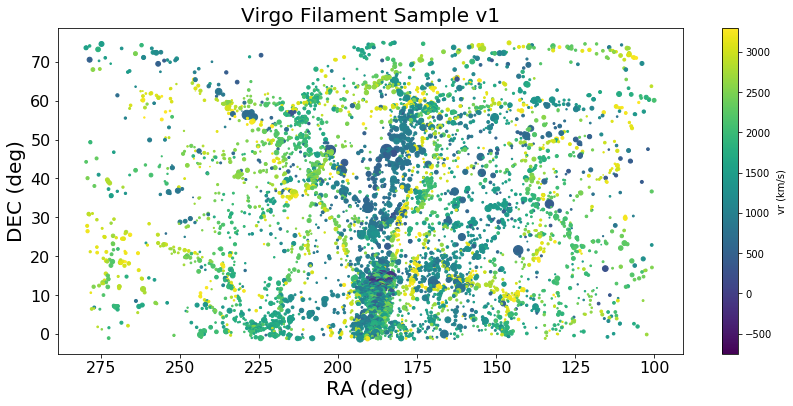

In [178]:
plt.figure(figsize=(14,6))
plt.scatter(v.main['RA'],v.main['DEC'],c=v.main['vr'],s=v.main['radius']/4)
plt.colorbar(label='vr (km/s)')
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().invert_xaxis()
plt.title('Virgo Filament Sample v1',fontsize=20)

# HI Sources

In [213]:
def plot_subset(flag,label,color=None,cbscale=None,size=None):
    ''' cbscale is (vmin,vmax) '''
    if color is None:
        color = v.main['vr']
    if size is None:
        size=15*np.ones(len(flag))
        
    plt.figure(figsize=(14,6))
    plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2,markersize=2)
    if cbscale is None:
        plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=color[flag],s=size[flag],zorder=10,label=label,cmap='viridis_r')
    else:
        plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=color[flag],s=size[flag],zorder=10,label=label,vmin=cbscale[0],vmax=cbscale[1],cmap='viridis_r')
    plt.colorbar()
    plt.xlabel('RA (deg)',fontsize=20)
    plt.ylabel('DEC (deg)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.gca().invert_xaxis()
    plt.legend()

Text(0.5, 1.0, 'ALFALFA HI Deficiency')

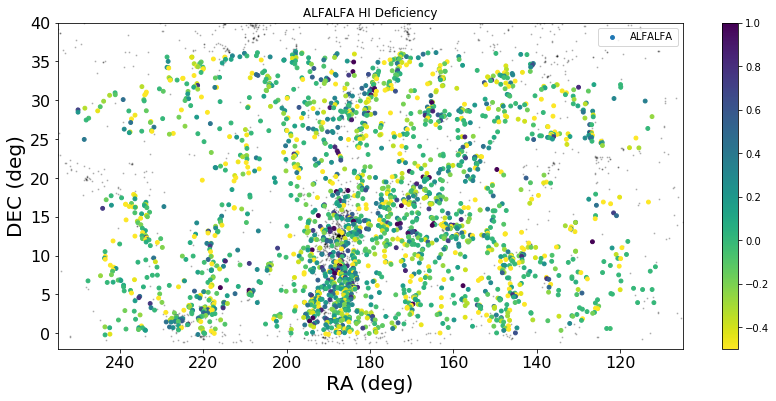

In [214]:
flag = v.main['A100flag']
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-.5,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA HI Deficiency')

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


Text(0.5, 1.0, 'ALFALFA HI Rich: HI Deficiency < -0.5')

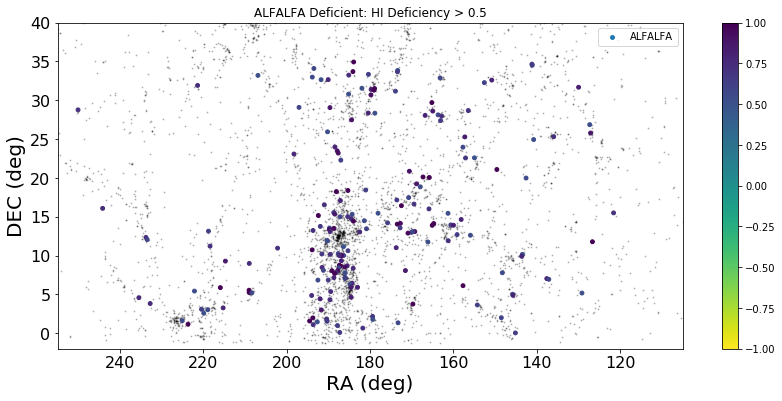

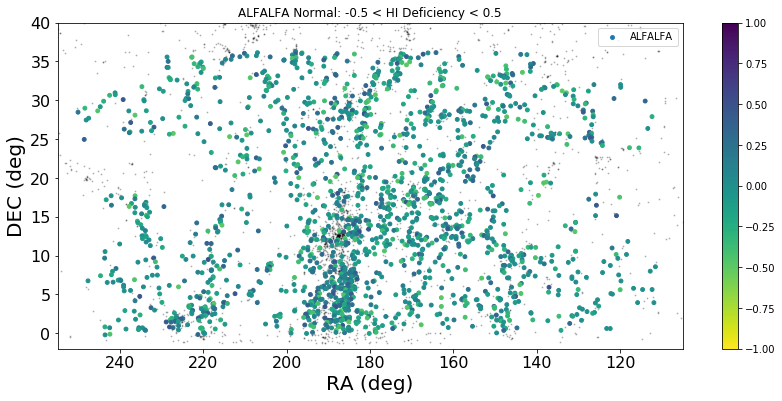

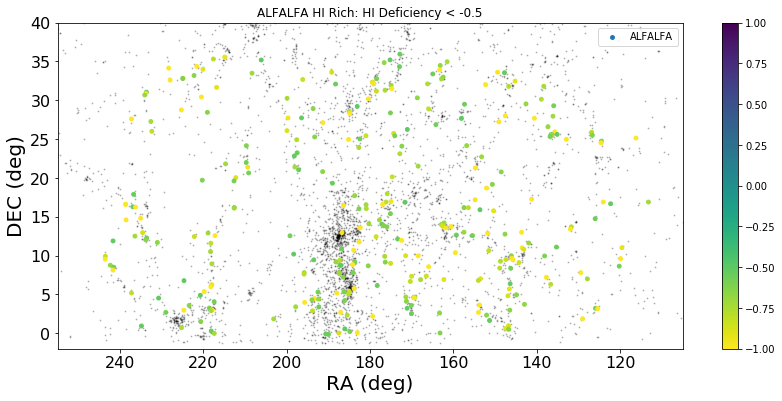

In [217]:
# deficient galaxies
flag = v.main['A100flag'] & (v.a100['HIdef_bytype'] > .5)
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-1,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA Deficient: HI Deficiency > 0.5')
# deficient galaxies
flag = v.main['A100flag'] & (v.a100['HIdef_bytype'] < .5)  & (v.a100['HIdef_bytype'] > -.5)
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-1,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA Normal: -0.5 < HI Deficiency < 0.5')
# deficient galaxies
flag = v.main['A100flag'] &  (v.a100['HIdef_bytype'] < -.5)
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-1,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA HI Rich: HI Deficiency < -0.5')

# Checking coordinates

* some are f4 and others are f8
* not sure what the combined RA is not f8 because I specifically declare it as 'f' clean_kitchen_sink

In [232]:
%run ~/github/Virgo/programs/readtables.py
# HL
print(v.hl['RA'].dtype)
print(v.hl['al2000'].dtype)
# NSA v0
print(v.nsav0['RA_1'].dtype)
print(v.nsav0['RA_2'].dtype)
# NSA v1
print(v.nsav1['RA_1'].dtype)
print(v.nsav1['RA_2'].dtype)
# A100

print(v.a100['RA'].dtype)
print(v.a100['RAdeg_Use'].dtype)

>f8
>f8
>f8
>f8
>f8
>f8
>f8
>f8


In [227]:
t = np.zeros(10,'f8')
print(t[0].dtype)

float64


# Plots to make

* compare ALFALFA HI and Nancy HI


In [235]:
v.co['MHI']

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


# Tables for Catalog papers

